## 0.그래프에서 한글 처리를 위해 실행

In [ ]:
###########폰트 라이브러리 불러오기#############
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

!apt-get update -qq
!apt-get install fonts-nanum* -qq #나눔폰트

%config InlineBackend.figure_format = 'retina'
sys_font=fm.findSystemFonts()
print(sys_font)# 체크해보면 폰트 개수가 늘어났다
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
mpl.font_manager._rebuild()

In [ ]:
sys_font=fm.findSystemFonts()
print(sys_font) ##폰트 보기
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/Liberatio

In [ ]:
#######런타임 다시 시작(Ctrl+M) 후 폰트 잘나오게 하기############
%matplotlib inline
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.minor.pad']=2
plt.rcParams['font.family']='NanumMyeongjo'  #폰트 설정
fm._rebuild()

## 1.Matplotlib을 이용한 시각화
- https://matplotlib.org/3.1.1/gallery/index.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html


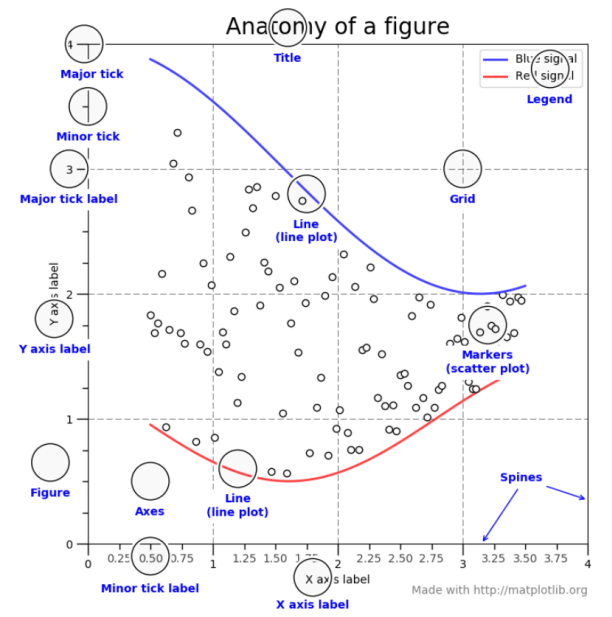

### 1-01. figure
- Matplotlib에서 그래프(Axes, plot)는 Figure 객체내에 존재함
- 그래프를 위한 새로운 Figure는 plt.figure() 함수를 통해 생성
- plt.figure(번호, figsize=크기, dpi=1인치당 픽셀)
    - Create a new figure, or activate an existing figure.
    - cell에는 기본 figure가 설정되어 있음 : 0번
    - 번호를 지정하면 지정한 번호의 figure에 그려짐, 입력된 번호의 figure가 없거나, 생략되면 새로운 figure 생성
    - figsize=(가로크기, 세로크기)로 figure 크기 조절
    - 크기 단위 : 인치, 기본 1인치 = 72 픽셀 (dpi를 사용해 조절 가능)


In [ ]:
Cell   - 텍스트를 포함한 사각형 (Cell은 여러 개의 Figure를 포함할 수 있음)
Figure - 전체 캔버스  (Figure는 여러 개의 Axes를 포함할 수 있음)
Axes - 1개 그래프 (Axes는 여러 개의 Plot을 포함할 수 있음)
Plot - 1개 선

In [ ]:
# 다음을 포함관계에 따라 넓은 것부터 작은 크기 순으로 나열해 보세요
  Axes, Cell, Figure, Plot



In [ ]:
import matplotlib.pyplot as plt
fig0 = plt.figure(0, figsize=(1,2), dpi=100) 
fig1 = plt.figure(1, figsize=(2,4))  
figX = plt.figure(figsize=(5, 1))
print(id(fig0), id(fig1), id(figX))

In [ ]:
# show 함수
# 그림은 show 함수 호출 전까지 누적됨, IPython에서는 show 호출 없어도 그려짐
# show를 호출하면 누적된 그림 출력
plt.show()

### 1-02. 선 그래프(Line plot)
- plt.plot() 함수 사용
- plt.plot([x], y, [fmt], [data]) 함수를 사용하여 x, y 축을 갖는 그래프 생성
    - x, y : array-like or scalar
    - fmt : str, optional, A format string, e.g. 'ro--' for red circles with dashed line
    - 'ro--' : fmtcolor='red', marker='o', linestyle='dashed'
    - data : indexable object, optional, DataFrame 같은 객체를 주면, x, y를 column 이름으로 줄 수 있음
- plot 설명에서 색, marker 등에 대한 정보 확인
- https://matplotlib.org/2.0.2/examples/color/named_colors.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

#### 1-02-1. 하나의 선 그리기
- plt.plot(y) : x는 [0, 1, 2, ..] 자동생성
- plt.plot(x, y) : x, y 둘 다 지정, 개수가 동일해야 함
- plt.plt(x, y, fmt) : 선의 스타일 지정

In [ ]:
import numpy as np
import pandas as pd
score = pd.Series([1340, 1500, 2400, 3500, 4500, 5000, 
                   5500, 4900, 4200, 3000, 2000, 1500], 
                  index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

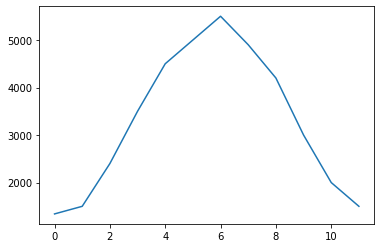

In [ ]:
# plot 그리기 실습
# y 축만 지정, x 축은 [0, 1, 2, 3...] 와 같이 자동으로 생성됨 

plt.show()

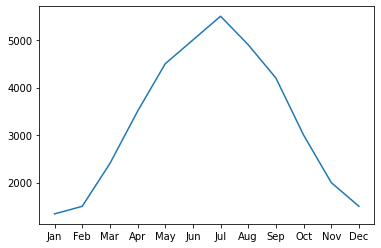

In [ ]:
# plot 그리기 실습
# x 축 : score.index
# y 축 : score.values


plt.show()

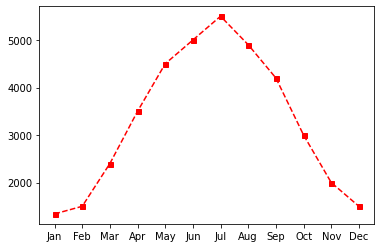

In [ ]:
# plt.plot(x, y, fmt)를 사용하여 다음과 같은 그래프를 그려본다
# x, y 축을 갖고, 빨간색 점선/사각형마커('rs--')로 표시되는 그래프
# x : score.index
# y : score.values
# fmt : 'rs--' / color='red', marker='s', markersize=9, linestyle='dashed'

# plot 그리기 실습


plt.show()

#### 1-02-2. 여러 선 그리기
- 하나의 plot 함수에 여러 선 정보 입력
    - plt.plot(x, y, fmt, x2, y2, style2, ...)
- plt.plot(x, y, fmt) 여러 번 사용
    - plt.plot(x, y, fmt)
    - plt.plot(x2, y2, fmt)

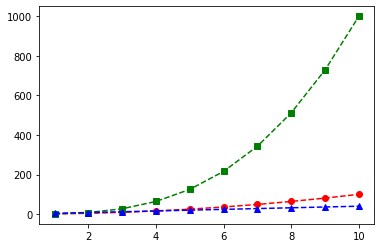

In [ ]:
# 여러 선 그리기'
# plt.plot(x, y, fmt)을 한 번 사용하여 작성해 본다
# fmt : 'ro--', 'gs--', 'b^--' 사용
x = np.arange(1, 11)
y1 = x ** 2
y2 = x ** 3
y3 = x * 4
# plot 그리기 실습


plt.show()

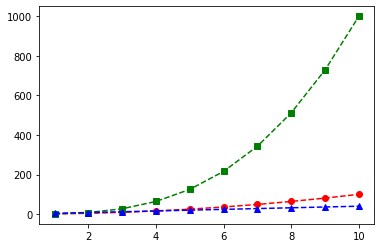

In [ ]:
# 여러 선 그리기
# plt.plot(x, y, fmt)을 여러 번 사용하여 작성해 본다
# fmt : 'ro--', 'gs--', 'b^--' 사용
x = np.arange(1, 11)
y1 = x ** 2
y2 = x ** 3
y3 = x * 4

# plot 그리기 실습



plt.show()

#### 1-02-3. x,y 축 레이블 표시
- plt.xlabel(str, fontsize) : x 축에 대한 레이블 표시
- plt.ylabel(str, fontsize) : y 축에 대한 레이블 표시
- plt.title(str, fontsize) : plot에 대한 제목

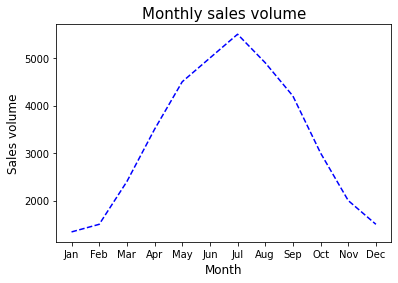

In [ ]:
# 다음 출력과 같이 레이블과 제목을 표시하도록 한다.
score = pd.Series([1340, 1500, 2400, 3500, 4500, 5000, 
                   5500, 4900, 4200, 3000, 2000, 1500], 
                  index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.plot(score, 'b--')
# x축 'month', y축 'Sales volume',  title 'Monthly sales volume'




plt.show()

#### 1-02-4. x, y 축 특정 영역만 표시
- Limitation : 전체 데이터 중에 특정 영역만 표시
- x, y 별도 설정
    - plt.xlim(min, max)
    - plt.ylim(min, max)
- x, y 한번에 설정
    - plt.axis([xmin, xmax, ymin, ymax]) 

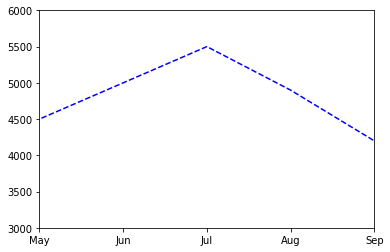

In [ ]:
# plt.xlim(min, max)
# plt.ylim(min, max)

score = pd.Series([1340, 1500, 2400, 3500, 4500, 5000, 
                   5500, 4900, 4200, 3000, 2000, 1500], 
                  index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.plot(score, 'b--')

# x 축에 대해서 'May'~'Sep', y축에 대해서 3000~6000 영역 표시


plt.show()

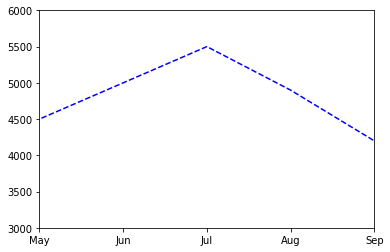

In [ ]:
# plt.axis([xmin, xmax, ymin, ymax]) 
score = pd.Series([1340, 1500, 2400, 3500, 4500, 5000, 
                   5500, 4900, 4200, 3000, 2000, 1500], 
                  index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.plot(score, 'b--')

# x 축에 대해서 'May'~'Sep', y축에 대해서 3000~6000 영역 표시

plt.show()

#### 1-02-5. 범례 표시
##### Legend(범례), 범례 설정을 위해 그래프에 label이 있어야 함
- 방법1
        plt.plot(x, y, style, label='text')
        plt.legend(loc='text')

- 방법2
        plt.plot에 label 생략 
        plt.legend(labels=[label1, label2 ...],loc='text')사용
        (순서, 개수 동일)

- loc : upper left, upper center, upper right, center left, center, center right, lower left, lower right, best, right 등


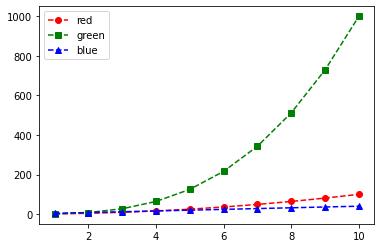

In [ ]:
x = np.arange(1, 11)
y1 = x ** 2
y2 = x ** 3
y3 = x * 4

# 다음과 같은 결과로 범례가 표시되도록 
# plt.plot의 label, plt.legend의 loc을 지정해 본다
# fmt : 'ro--', 'gs--', 'b^--' 사용


plt.show()

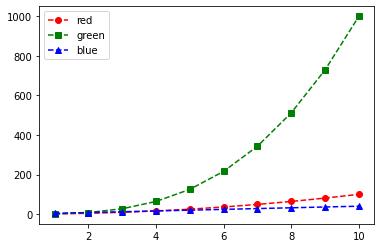

In [ ]:
x = np.arange(1, 11)
y1 = x ** 2
y2 = x ** 3
y3 = x * 4

# 다음과 같은 결과로 범례가 표시되도록 
# plt.legend에 labels 및 loc을 지정해 본다
# fmt : 'ro--', 'gs--', 'b^--' 사용

plt.plot(x, y1,'ro--', x, y2, 'gs--', x, y3, 'b^--')


plt.show()

#### 1-02-6. 눈금선 표시
- plt.grid() : 눈금선 표시 (True 사용가능)
- plt.grid(False) : 눈금선 표시 안함
- plt.grid(which='both', axis='both', color='gray', dashes=(3,3))
    - 종류지정 - which : {'major', 'minor', 'both'}
    - 축지정 - axis : {'both', 'x', 'y'}
    - 점선모양 지정 - dashes : (5, 2, 1, 2) describes a sequence of 5 point and 1 point dashes separated by 2 point spaces.
    - 투명도 지정 - alpha : 0~1 
    - linestyle, linewidth 눈금선 모양과 두께 지정 ('-', '--', '-.', ':' 등)
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html

In [ ]:
# 눈금선 표시
x = np.arange(1, 11)
y1 = x ** 2
y2 = x ** 3
y3 = x * 4
plt.plot(x, y1,'ro--', x, y2, 'gs--', x, y3, 'b^--')
plt.legend(['red', 'green', 'blue'], loc='best')

# 눈금선이 표시되도록 설정

# 눈금선의 스타일 설정


plt.show()

#### 1-02-7. 눈금 간격 설정

ax = plt.axes()  # axes 객체를 받아옴
- Axes.set_xticks(self, ticks, *, minor=False)
- Axes.set_yticks(self, ticks, *, minor=False)
- 주 눈금 설정
    - ax.set_xticks(array-like)
    - ax.set_yticks(array-like)
- 보조 눈금 설정
    - ax.set_xticks(array-like, minor=True)
    - ax.set_yticks(array-like, minor=True)

In [ ]:
ax=plt.axes()  

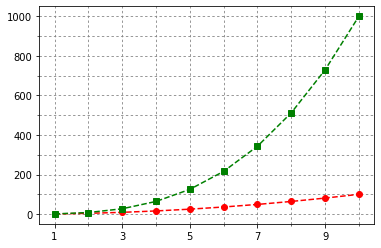

In [ ]:
# 주눈금, 보조눈금 설정
import matplotlib.ticker as ticker

x = np.arange(1, 11)
y1 = x ** 2
y2 = x ** 3




# 눈금선이 표시되도록 설정
plt.plot(x, y1,'ro--', x, y2, 'gs--')
plt.grid(which='both', axis='both', color='gray', dashes=(3, 3))
plt.show()

#### 1-02-8. Tick 설정
- Tick : 그래프의 축에 간격을 구분하기 위해 표시하는 눈금
- plt.xticks(ticks=None, labels=None, **kwargs)
    - ticks : array-like, optional
    - labels : array-like, optional
    - kwargs : Text property
- xticks : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
- kwargs : https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text

- plt.tick_params() 눈금의 스타일 설정
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tick_params.html

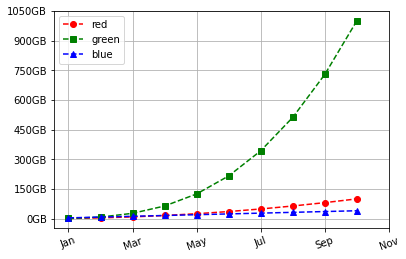

In [ ]:
# Tick 설정
x = np.arange(1, 11)
y1 = x ** 2
y2 = x ** 3
y3 = x * 4
plt.plot(x, y1,'ro--', x, y2, 'gs--', x, y3, 'b^--')
plt.legend(['red', 'green', 'blue'], loc='best')

# 보조눈금선이 표시되도록 설정
plt.xticks(np.arange(1, 13, 2),
           labels=['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov'],
           rotation=20)
ytick = np.arange(0, 1101, 150)
plt.yticks(ytick, labels=[f'{x}GB' for x in ytick])
plt.grid()
plt.show()

#### 1-02-9. 설명 화살표, 글 표시
- plt.annotate(text, xy, xytext, arrowprops) 매우 다양한 형식이 있음!
    - text : 표시할 문구
    - xy : 화살표를 표시할 좌표, (x, y)
    - xytext : 문구를 표시할 좌표, (x, y)
    - arrowprops : 화살표 속성, dict 객체 지정 {'color':'blue'}
- annotations : https://matplotlib.org/tutorials/text/annotations.html

- plt.text(x, y, text)
    - x, y : 문구 표시할 위치 좌표
    - text : 표시할 문구
- text : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html    

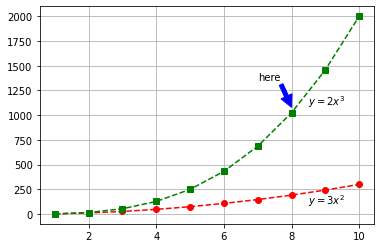

In [ ]:
# 그림 내 텍스트
x = np.arange(1, 11)
y1 = 3 * x ** 2
y2 = 2 * x ** 3
plt.plot(x, y1,'ro--', x, y2, 'gs--')
# here = 8, 1100(화살표 위치), 7, 1350 (text)
# 3x^2 = 8.5, 100
# 2x^3 = 8.5, 1100



plt.grid()
plt.show()

### 1-03. Subplot
- 여러 plot을 나누어 표시
- plt.subplot(row, col, idx)
   - row, col : shape(행, 열)
   - idx : 일련번호 1부터 시작
- figure, axes = plt.subplots(row, col, **args) 
   - row, col : shape(행, 열)
   - sharex = True (x축을 공유한다는 의미) 
   - constrained_layout = True (subplot 간 간격 확보 - 제목 달때)
- figure : 1개 캔버스
- axes : 캔버스 위에 그려지는 1개 그래프
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html  

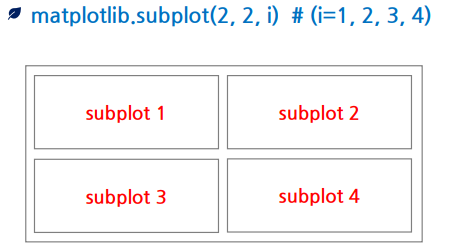

In [ ]:
name = ["Kim", "Yoon", "Choi", "Park"]
month = ["March", "April", "May", "June"]
data = {'name'    : month,
        'english' : [80, 90, 100, 95],
        'chinese' : [100, 80, 70, 85],
        'korean'  : [95, 100, 80, 60],
        'math'    : [90, 70, 60, 100]}
df = pd.DataFrame(data)        
df

,name,english,chinese,korean,math
0,March,80,100,95,90
1,April,90,80,100,70
2,May,100,70,80,60
3,June,95,85,60,100


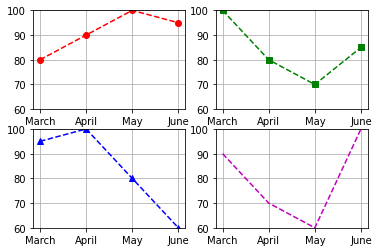

In [ ]:
# subplot
plt.subplot(2,2,1)
plt.plot('name', 'english', 'ro--', data=df)
plt.ylim(60, 100)
plt.grid()
plt.subplot(2,2,2)
plt.plot('name', 'chinese', 'gs--', data=df)
plt.ylim(60, 100)
plt.grid()
plt.subplot(2,2,3)
plt.plot('name', 'korean', 'b^--', data=df)
plt.ylim(60, 100)
plt.grid()
plt.subplot(224) # 하나의 숫자로 표현
plt.plot('name', 'math', 'm--', data=df)
plt.ylim(60, 100)
plt.grid()
plt.show()

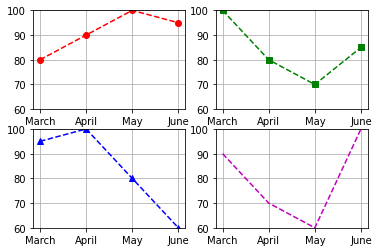

In [ ]:
# subplot - iteration 사용
x = 'name'
y = ['english', 'chinese', 'korean', 'math']
fmt = ['ro--', 'gs--', 'b^--', 'm--']
r, c = 2, 2

# 위와 동일한 동작을 하는 subplot을 iteration을 사용하여 만들어 보도록 합니다.


plt.show()

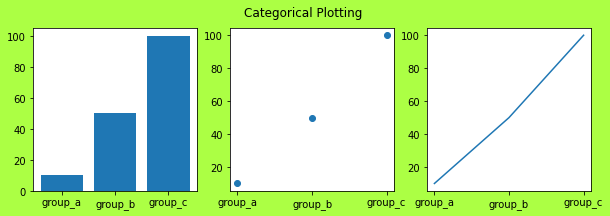

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [10,50,100]
graphs = [plt.bar, plt.scatter, plt.plot]
#[131][132][133]
plt.figure(1, figsize=(10,3), facecolor ='#ACFF44')



plt.suptitle('Categorical Plotting')
plt.show()

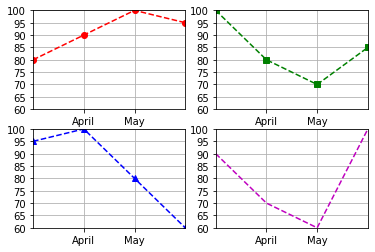

In [ ]:
# subplots - iteration 사용
x = 'name'
y = ['english', 'chinese', 'korean', 'math']
fmt = ['ro--', 'gs--', 'b^--', 'm--']
r, c = 2, 2

fig, axes = plt.subplots(r, c) #, sharex=True, sharey=True)   
for axflat, cy, style in zip(axes.flat, y[:r*c], fmt[:r*c]):
    axflat.plot(x, cy, style, data=df)
    # 축(axis) ticks 지정, ticks를 없앨때 []사용
    axflat.set(xticks=[1, 2], yticks=range(60, 101, 5))  
    #axflat.axis('off') # axis를 아예표시 하지 않음    
    axflat.axis(['March', 'June', 60, 100])
    axflat.grid()
plt.show()

### 1-04. Scatter
- 산점도, 산포도, 분산 형 차트
- 두 데이터간의 관계를 보기 위해 사용함
- plt.scatter(x, y, s, c, alpha)
   - s : scale
   - c : color
   - alpha : 투명도(0~1)
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html   
- line style은 링크 참고
  - https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py   

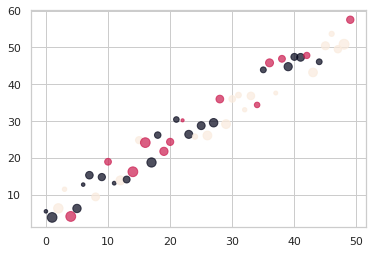

In [ ]:
np.random.seed(100)
x = np.arange(50)
y = x + np.random.rand(50) * 10
size  = np.random.randint(10, 100, 50)
color = np.random.randint(200, 203, 50)

# 크기를 size, 색상을 color, 투명도를 0.7로 지정하여 산점도 그래프를 그리세요. 

plt.show()

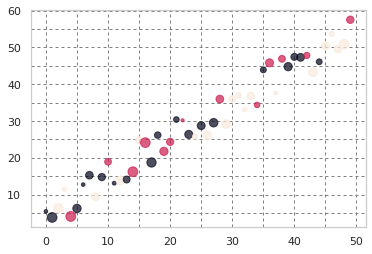

In [ ]:
# scatter (산포도) : 데이터 분포를 보기 위해 사용하는 그래프
np.random.seed(100)
x = np.arange(50)
y = x + np.random.rand(50) * 10
size  = np.random.randint(10, 100, 50)
color = np.random.randint(200, 203, 50)

# plt.axes() -> axes 반환
ax = plt.axes()
ax.set_xticks(np.arange(0, 51, 10))
ax.set_yticks(np.arange(-10, 71, 10))
ax.set_xticks(np.arange(0, 51, 5), minor=True)
ax.set_yticks(np.arange(-10, 71, 5), minor=True)
plt.grid(which='both', color='gray', dashes=(3,3))
# s=size, c=color, alpha=투명도 (0~1, 0:투명, 1:불투명)
plt.scatter(x, y, s=size, c=color, alpha=0.7)
plt.show()

### 1-05. Bar 그래프
- 여러 대상의 양적의 비교가 필요할 때 사용
- 시간의 흐름에 따른 비교도 할 수 있지만, 변화의 흐름 보다는 변화의 크기에 집중이 필요할 때 사용함
- plt.bar(x, y) : 수직바
- plt.barh(x, y) : 수평바
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html

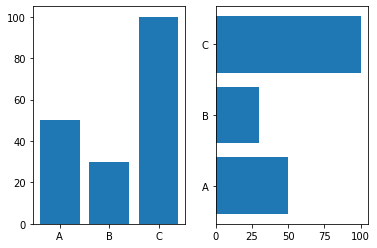

In [ ]:
names = ['A', 'B', 'C']
values= [50, 30, 100]
plt.subplot(121)
plt.bar(names, values)  # x, y
plt.subplot(122)
plt.barh(names, values)
plt.show()

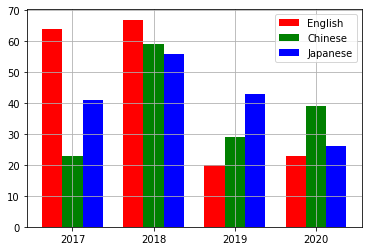

In [ ]:
# 여러 개의 bar 넣는 방법
import numpy as np
np.random.seed(0)
data = np.random.randint(20, 70, (3,4))
X = np.arange(4)
for i, c in zip(range(len(data)), list('rgb')) :
    plt.bar(X + i*0.25, data[i], color = c, width = 0.25)
plt.legend(labels=['English', 'Chinese', 'Japanese'])  
plt.xticks(X+0.25, labels=['2017', '2018', '2019', '2020'])
plt.yticks(np.arange(0, 80, 10))  
plt.grid()
plt.show()    

### 1-06. 히스토그램(Histogram)
- 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현(일변량 그래프)
- 히스토그램을 그리기 위한 hist 명령은 bins 인수로 데이터를 집계할 구간 정보를 받음
- 데이터 집계 결과를 반환
- n, bins, patches = plt.hist(x, bins, range)
   - x : 데이터
   - bins : 계급
   - range: 대상 범위, (min, max)
   - n : 도수 
   - patches : 계급별 히스토그램 좌표와 높이
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html   

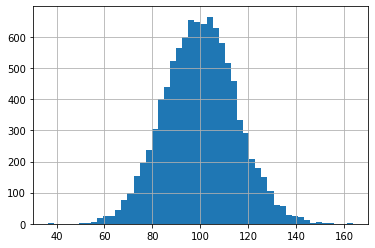

In [ ]:
# histogram
np.random.seed(1)
x = np.random.normal(100, 15, 10000)
n, bins, patches = plt.hist(x, 50)
plt.grid()
plt.show()

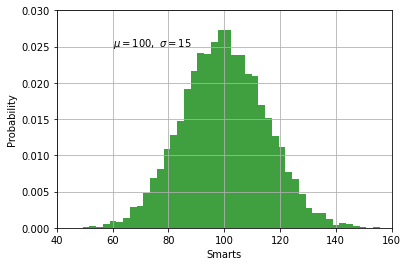

In [ ]:
np.random.seed(1)
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.text(60, 0.025, f'$\mu={mu},\ \sigma={sigma}$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### 1-07. Pie 그래프
- 전체에 대한 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프
- 각 부채꼴의 중심각이 전체에서 차지하는 비율을 나타내며, 비율을 한눈에 볼 수 있다는 장점이 있음
- 전체적인 비율을 쉽게 파악할 수 있어서 언론사에서 통계 수치를 공개할 때 자주 활용됨
- plt.pie(data, labels, colors, autopct)
   - data : 데이터
   - labels : 각 부채꼴의 레이블
   - colors : 각 부채꼴의 색상
   - autopct : 비율 표시 형식
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

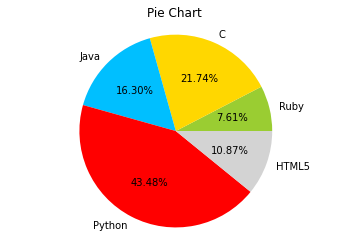

In [ ]:
import matplotlib.pyplot as plt
color = ['yellowgreen', 'gold', 'deepskyblue', 'red', 'lightgrey']
langs = ['Ruby', 'C', 'Java', 'Python', 'HTML5']
students = [7, 20, 15, 40, 10]
plt.figure(figsize=(6,4))
plt.pie(students, labels=langs, colors = color, autopct='%.2f%%')
plt.axis('equal')
plt.title('Pie Chart')
plt.show()

### 1-08. 이미지 출력
- plt.imshow(arraylike or PIL)
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

In [ ]:
!wget -N https://raw.githubusercontent.com/Soyoung-Yoon/data/main/cake.png

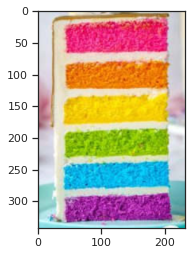

In [ ]:
# PIL(Python Image Library), Pillow
# img = Image.open(path)
# plt.imshow(img)
# RGB 순서
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('cake.png')
plt.imshow(img)
plt.show()


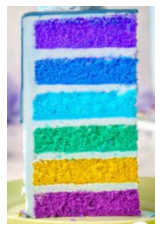

In [ ]:
# OpenCV
# img=cv2.imread(path)
# BGR 순서
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('cake.png')  

#plt.imshow(img[ ... , ::-1]) # img => axis = 0, 1, 2
plt.imshow(img)
plt.axis('off')  # 축표시 제거
plt.show()

## 2.Seaborn을 이용한 시각화
- matplotlib를 기반으로 하는 Python visualization라이브러리
- attractive한 통계적 그래프를 제공하는 라이브러리
- 공식사이트 : ```http://seaborn.pydata.org```
    - boxplot
    - swarmplot
    - lmplot
    - heatmap
    - pairplot
- 참고 : https://www.codecademy.com/articles/seaborn-design-i    

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### 2-01. Seaborn의 스타일, 팔렛트 
- sns.set_style(style) : 스타일 설정
  - style : 'white', 'dark', 'whitegrid', 'darkgrid' ..
- x = sns.color_palette(palette) : 팔렛트 객체 가져오기
- sns.set_palette(x) : 팔렛트 설정
    - palette : 'Set1', 'Pastel1' ... 
    - x : 팔렛트 객체
- sns.set_context(x) : context 설정
    - x : 'paper', 'poster' ...    

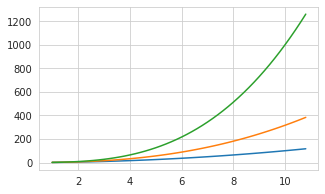

In [ ]:
# 라인플롯(Line plot) 그리기
x = np.arange(1, 11, 0.2)
y1 = x ** 2
y2 = x ** 2.5
y3 = x ** 3
# 스타일 설정
sns.set_style("whitegrid")
plt.figure(figsize=(5,3))
plt.plot(x, y1, x, y2, x, y3)
plt.show()

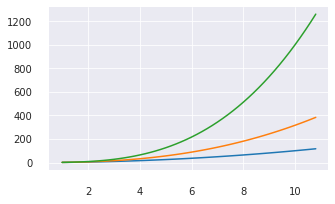

In [ ]:
tips = sns.load_dataset("tips")
sns.stripplot(x="day", y="total_bill", data=tips)
plt.show()

In [ ]:
# 팔레트 값!
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 
'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 
'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 
'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r' ... 등등
'''

### 2-02. iris Data를 활용한 시각화 실습

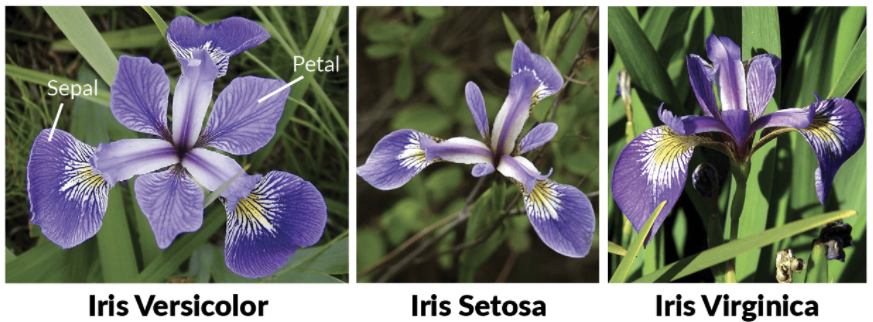

In [ ]:
# 데이터 불러오기
# sns.load_dataset(데이터셋의 이름)
# iris(붓꽃) 데이터를 불러옴
# sepal : 꽃받침, petal : 꽃잎
iris = sns.load_dataset("iris")
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 2-02-1. BoxPlot으로 분포 확인
seaborn.boxplot(*, x=None, y=None, hue=None, data=None)
- x : x축 데이터
- y : y축 데이터
- hue : 범주형 입력 데이터
- http://seaborn.pydata.org/generated/seaborn.boxplot.html

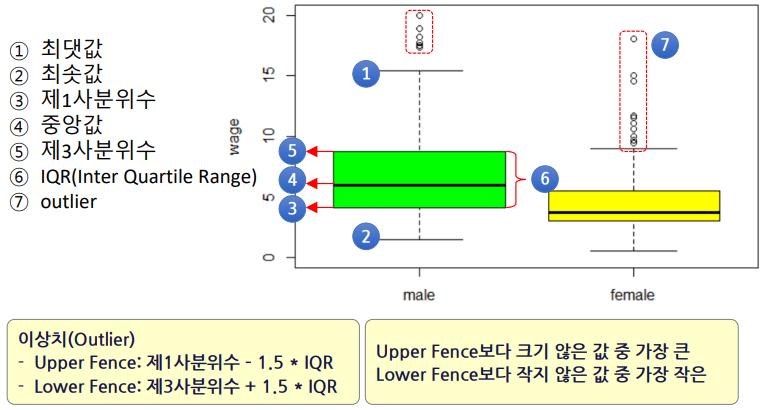

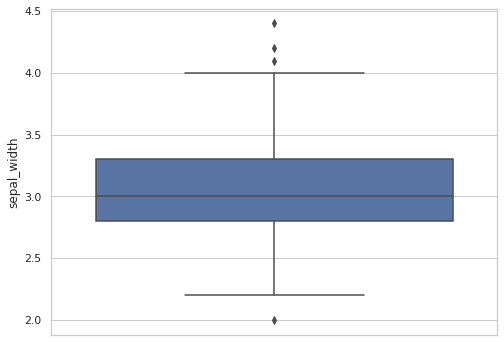

In [ ]:
# 값의 분포를 boxplot으로 확인함
# x에 1D 값을 전달하면 수평, y에 1-D 값을 전달하면 수직
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
# boxplot 그리기

plt.show()

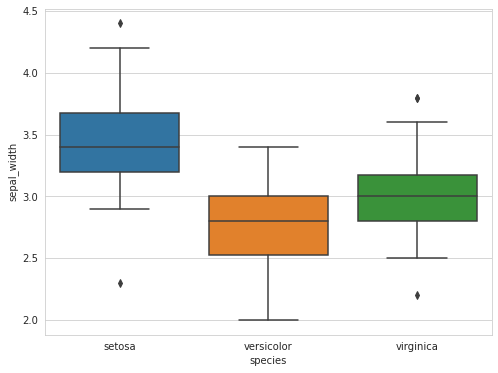

In [ ]:
# 특정 카테고리에 대한 값의 분포는 X,Y를 지정하여 확인 가능
# x, y에 값을 전달하고 둘 중 하나가 범주형이면 범주에 따른 값으로 나뉘어 출력
# data에 df을 지정해주면 x, y 전달 시 열의 레이블만 전달해도 됨

plt.figure(figsize=(8,6))
# boxplot 그리기


plt.show()

In [ ]:
# 임의 데이터 추가 (범주형)
color = ['red', 'violet']
iris['color'] = [color[x] for x in np.random.randint(0,2, 150)]
iris.color

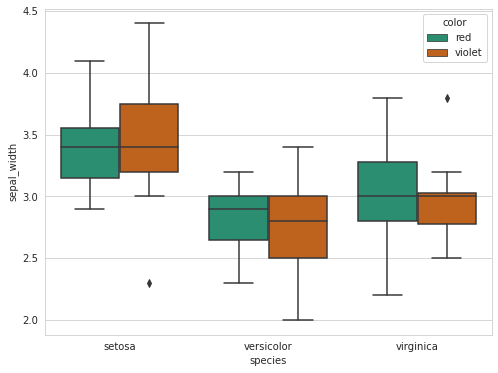

In [ ]:
# hue 옵션 : 범주형 입력 데이터 (카테고리 별 데이터 시각화 가능)
# palette 옵션을 통해 색상 지정 가능 
plt.figure(figsize=(8,6))
# 그래프 그리기, pallette='Dark2' 사용

plt.show()

In [ ]:
# 팔레트 값!
'''
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 
'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 
'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 
'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r' ... 등등
'''

#### 2-02-2. Swarmplot
- boxplot 보다 원본 데이터의 분포를 더 자세하게 확인할 때 사용
- seaborn.swarmplot(*, x=None, y=None, hue=None, data=None)
   - x : x축 데이터
   - y : y축 데이터
   - hue : 범주형 입력 데이터
- http://seaborn.pydata.org/generated/seaborn.swarmplot.html

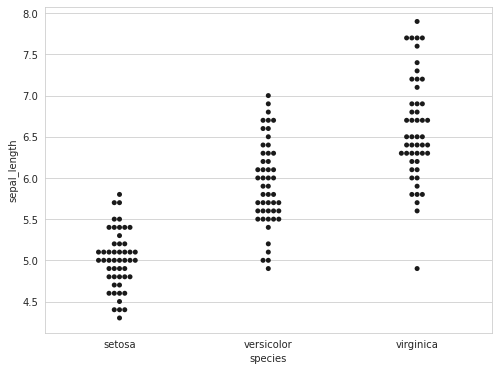

In [ ]:
#swarmplot : 원본 데이터의 분포를 자세하게 확인
plt.figure(figsize=(8,6))
# swarmplot 그리기, color='.1' 사용  # 0:진한것, 1:보이지 않음


plt.show()

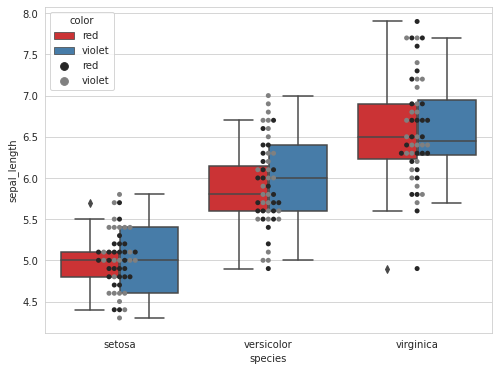

In [ ]:
# boxplot(palette='Set1') + swarmplot(color='.5')
# x="species", y="sepal_length", hue='color', data = iris
plt.figure(figsize=(8,6))


plt.show()

#### 2-02-3. Implot
- 단순 선형 회귀 그래프 생성
- seaborn.lmplot(*, x=None, y=None, data=None, hue=None)
   - x : x축 데이터
   - y : y축 데이터
   - hue : 범주형 입력 데이터
- http://seaborn.pydata.org/generated/seaborn.lmplot.html


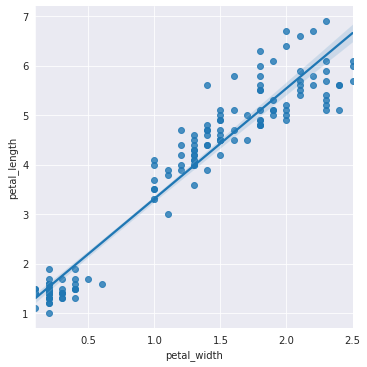

In [ ]:
# Implot를 이용하여 단순 선형 회귀 그래프를 생성할 수 있음
sns.set_style("darkgrid")
# petal_width, petal_length에 대한 선형그래프


plt.show()

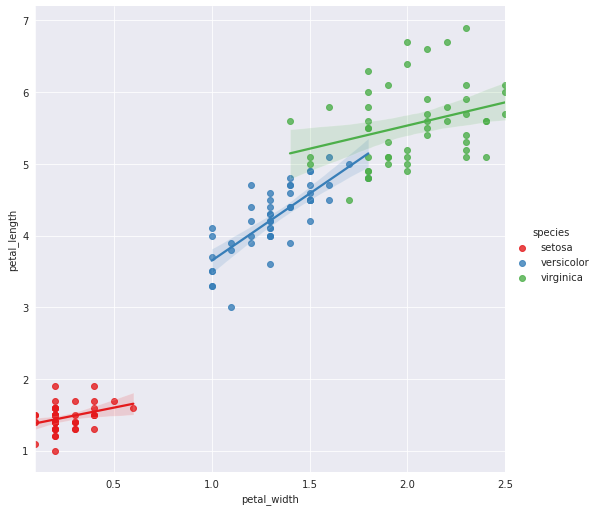

In [ ]:
# hue 옵션에 범주형 데이터를 전달하면 클래스별 회귀선이 그려짐

plt.show()

#### 2-02-4. pairplot 
- 각 변수 별 데이터 분포 및 변수간 관계를 분석
- http://seaborn.pydata.org/generated/seaborn.pairplot.html

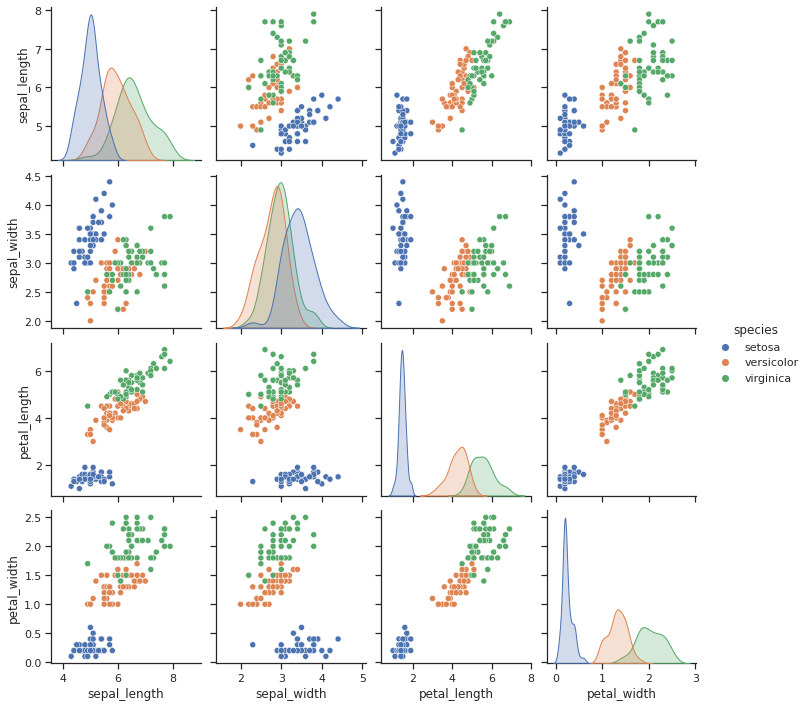

In [ ]:
# pairplot을 이용하여 변수(컬럼)간 관계와 분포 확인 가능
# 같은것의 위치에서는 Kernel Density Estimation(커널밀도추정) 또는 히스토그램이 표시됨
#
# hue 옵션을 이용하여 카테고리별 분포를 볼 수  있음
sns.set(style="ticks")
sns.set_context('notebook')


plt.show()

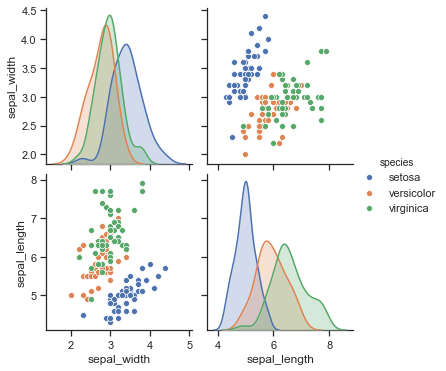

In [ ]:
# vars 옵션을 이용하여 특정 변수만 지정 가능
# vars=['sepal_width', 'sepal_length']

plt.show()

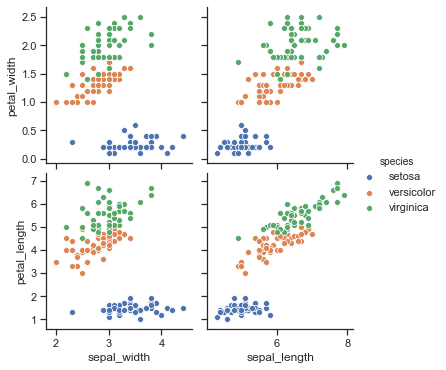

In [ ]:
# x_vars, y_vars 옵션을 사용하여 해당 축의 특정 변수만 지정 가능
# 이 경우 히스토그램 혹은 KDE가 출력되지 않을 수 있음
# x_vars=['sepal_width', 'sepal_length'], y_vars=['petal_width', 'petal_length']


plt.show()

#### 2-02-5. heatmap
- 두 개의 카테고리 값에 의한 값의 변화를 보고자 할 경우에 사용
- 표출하고자 하는 데이터를 먼저 데이터 테이블 형태로 만들어야 함
- http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
# ires 의 상관계수 구하기
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


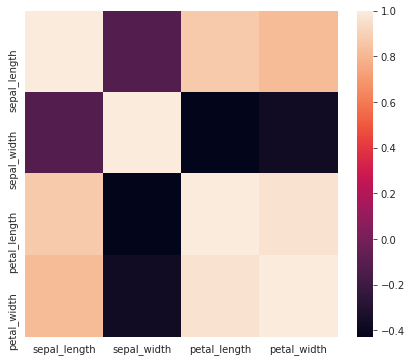

In [ ]:
# heapmap 함수를 사용하여 데이터 테이블 시각화
plt.figure(figsize=(7,6))

plt.show()

In [ ]:
# flights 데이터 세트 불러오기
flights = sns.load_dataset("flights")
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
# 해당 데이터를 heatmap으로 만들기 위해 'pivot' 함수를 사용하여 데이터 테이블 생성
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


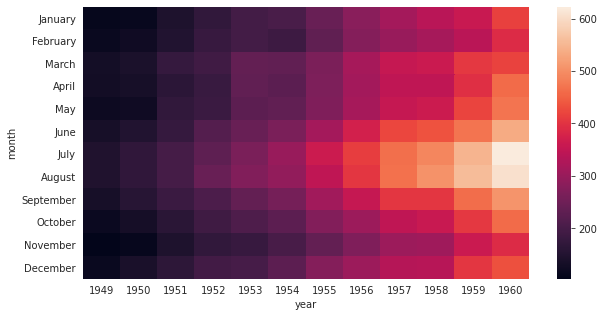

In [ ]:
# heapmap 함수를 사용하여 데이터 테이블 시각화
plt.figure(figsize=(10,5))
sns.heatmap(flights)
plt.show()

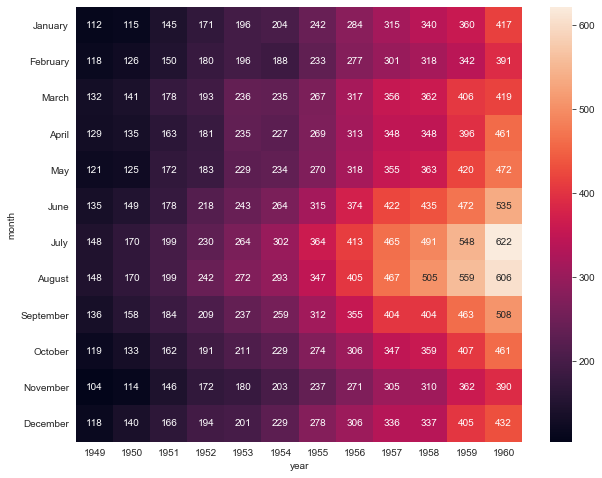

In [ ]:
# annot 옵션을 통해 값 출력 가능
# fmt 옵션을 통해 데이터의 형식을 지정(d:정수, f:실수)
plt.figure(figsize=(10,8))

plt.show()